In [1]:
# The script version of this tool can be found at: 
#      repo/emulator_Nx2pt/emu_Nx2pt/gen_train_set/draw_pco_params.py

In [2]:
import numpy as np
from pyDOE import lhs
import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size=16)

In [3]:
par_lim = {
    'Omega_m': [ 0.2  , 0.4   ],
    'sigma_8': [ 0.8  , 0.85  ],
    'Omega_b': [ 0.042, 0.050 ],
    'n_s'    : [ 0.9  , 1.02  ], 
    'h'      : [ 0.6  , 0.8   ],
}
# 1,000,000 points
# avg. x^2 (exclude boundary) ... 
# 

In [4]:
def rescale(arr_in, domain):
    return domain[0] + arr_in * (domain[1]-domain[0])

In [5]:
def draw_lhs_samples(Npts, par_lim, criterion='cm'):
    '''
    criterion: a string that tells lhs how to sample the points (default: None, which simply randomizes the points within the intervals):
        “center” or “c”: center the points within the sampling intervals
        “maximin” or “m”: maximize the minimum distance between points, but place the point in a randomized location within its interval
        “centermaximin” or “cm”: same as “maximin”, but centered within the intervals
        “correlation” or “corr”: minimize the maximum correlation coefficient
    '''
    
    Ndim = len(par_lim)
    

    #start = time.time()
    samples = lhs(Ndim, samples=Npts, criterion=criterion)
    #end = time.time()
    #period = (end - start)/60.
    #print(f'lhs finished: {period} mins')
    
    samples_dict = {}
    for j, key in enumerate(par_lim.keys()):
        samples_dict[key] = rescale(arr_in=samples[:, j], domain=par_lim[key])
        
    return samples_dict

In [6]:
Npts = 10
pco_samples = draw_lhs_samples(Npts=Npts, par_lim=par_lim)

In [7]:
data_dir = '/home/hhg/Research/emu_Nx2pt/data/'
filename = data_dir+f'pco_train_{Npts}.pkl'
print(f'output file to:', filename)

output file to: /home/hhg/Research/emu_Nx2pt/data/pco_train_10.pkl


In [8]:
import pickle

with open(filename, 'wb') as handle:
    pickle.dump(pco_samples, handle)

## Check generate samples

In [9]:
Npts = 100
pco_samples = draw_lhs_samples(Npts=Npts, par_lim=par_lim)

Text(0, 0.5, '$\\sigma_8$')

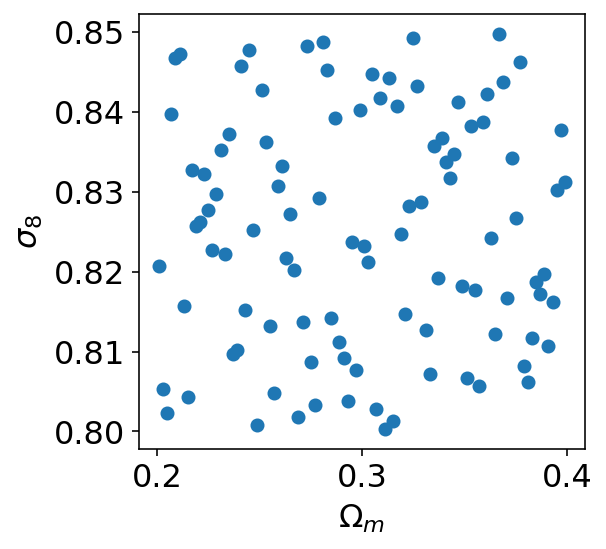

In [10]:
plt.figure(figsize=(4,4))
plt.scatter(pco_samples['Omega_m'], pco_samples['sigma_8'])
plt.xlabel('$\Omega_m$')
plt.ylabel('$\sigma_8$')

### Time Estimate of pyDOE.lhs

In [11]:
from pyDOE import lhs

In [12]:
%time samples_ori = lhs(5, samples=1000, criterion='cm')

CPU times: user 8.49 s, sys: 52.2 ms, total: 8.54 s
Wall time: 8.54 s


In [13]:
%time samples_ori = lhs(5, samples=2000, criterion='cm')

CPU times: user 33.9 s, sys: 202 ms, total: 34.1 s
Wall time: 34.1 s


In [14]:
%time samples_ori = lhs(5, samples=4000, criterion='cm')

CPU times: user 2min 15s, sys: 753 ms, total: 2min 15s
Wall time: 2min 15s


- It looks like the run time of `pyDOE.lhs` scales as O(n^2).
- If drawing 1000 points takes ~10 seconds. 0.6M points would take me ~ 600^2x10 seconds = 1000 hours...

In [15]:
%time samples_ori = lhs(5, samples=1000, criterion='c')

CPU times: user 1.52 ms, sys: 17 µs, total: 1.54 ms
Wall time: 1.04 ms


In [16]:
%time samples_ori = lhs(5, samples=2000, criterion='c')

CPU times: user 1.73 ms, sys: 22 µs, total: 1.76 ms
Wall time: 1.2 ms


In [17]:
%time samples_ori = lhs(5, samples=4000, criterion='c')

CPU times: user 0 ns, sys: 2.43 ms, total: 2.43 ms
Wall time: 1.6 ms
